In [39]:
using LinearAlgebra
using Plots
using DelimitedFiles
#=
xpsのパラメータ設定に
Ucf = 1.8*Uff
を追加した


マテリアルパラメータに対するスペクトルの変化

t大 -> 幅大、左側のピークが非常に大きい
t小 -> 幅小、左側のピークが非常に大きい



=#

In [40]:
t = 3.2
delta = 9
Ucf = 10.2
smalldelta = 0.5

Uff = Ucf/1.8

5.666666666666666

In [41]:
Hg =  [
   0 t
   t delta ]

2×2 Matrix{Float64}:
 0.0  3.2
 3.2  9.0

In [42]:
Hf =  [
   0 t
   t delta - Ucf + Uff  ]

2×2 Matrix{Float64}:
 0.0  3.2
 3.2  4.46667

In [43]:
Eg,Vg = eigen(Hg)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -1.0217750769114093
 10.02177507691141
vectors:
2×2 Matrix{Float64}:
 -0.952616  0.304175
  0.304175  0.952616

In [44]:
Ef,Vf = eigen(Hf)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -1.6689452033395396
  6.135611870006207
vectors:
2×2 Matrix{Float64}:
 -0.886655  0.462431
  0.462431  0.886655

In [45]:
function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end

F1 (generic function with 1 method)

In [46]:
function F2(Eg,Vg,Ef,Vf,Eb)
    return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
 end

F2 (generic function with 1 method)

In [47]:
fp = open("xasoutput.dat","w")
for Eb in -10:0.001:10
    ints = (-1/pi)imag(F1(Eg[1],Vg,Ef[1],Vf,Eb) + F2(Eg[1],Vg,Ef[2],Vf,Eb))
    println(fp,Eb,",",ints)
end
close(fp)

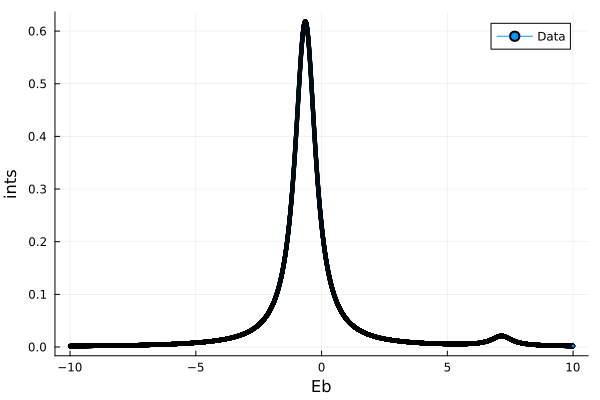

In [48]:
# ファイルを読み取り
data = readdlm("xasoutput.dat",',')

# データを x と y に分割
x = data[:, 1]
y = data[:, 2]

# サイズの変更
x = x[:]
y = y[:]

# プロットを作成
plot(x, y, xlabel="Eb", ylabel="ints", label="Data", marker=:circle, markersize=2)
